**Table of contents**<a id='toc0_'></a>    
- 1. [Illustrating the Edgeworth box given set $\mathcal{C}$](#toc1_)    
- 2. [Calculating the error in the market clearing conditions](#toc2_)      
- 3. [Market clearing price](#toc3_)    
- 4. [Price optimization](#toc4_)
- 5. [Utility optimization](#toc5_)
- 6. [Social planner optimization](#toc6_)
- 7. [Drawing of set $\mathcal{W}$](#toc7_)
- 8. [Market equilibrium](#toc8_)         
<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# Imports

In [1]:
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})
import numpy as np

%load_ext autoreload
%autoreload 2
from inauguralproject_rabiah_philippe_sulaiman import ExchangeEconomyClass

# Model class

The ExchangeEconomyClass file code has been inserted into .py file, and ran imported below to model.

### 2.1. <a id='toc2_1_'></a>[Basic Edgeworth box](#toc0_)

In [2]:
model = ExchangeEconomyClass()

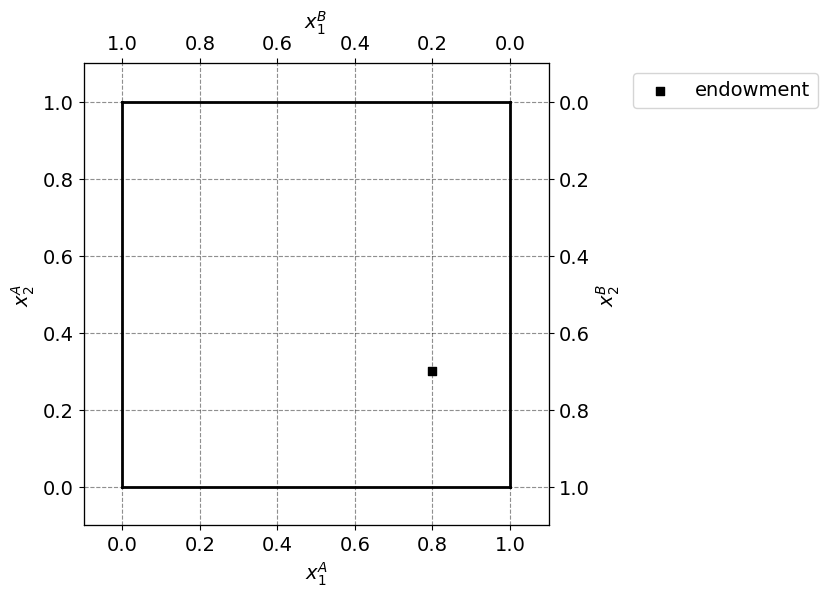

In [3]:
model = ExchangeEconomyClass()
par = model.par
# a. total endowment
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# A
ax_A.scatter(par.w1A,par.w2A,marker='s',color='black',label='endowment')

# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.6,1.0));

## 1. <a id='toc1_'></a>[Illustrating the Edgeworth box given set $\mathcal{C}$](#toc1_)

We use set $\mathcal{C}$ to illustrate the Edgeworth box, depicting the solutions on the contract curve. The pareto optimal allocations in relation to the initial endowments are computed. 

Indifference curves for each player are drawn and are convex. representing combinations of the two goods that provide the same level of utility to the given player.

Any movement from an initial point to a closer point on the contract curve would represent a Pareto improvement, leaving atleast one player better off and no one other player worse off. Thus, agents should trade within any point on the contract curve that lies withnin $\mathcal{C}$. 

namespace(alpha=0.3333333333333333, beta=0.6666666666666666, w1A=0.8, w2A=0.3)


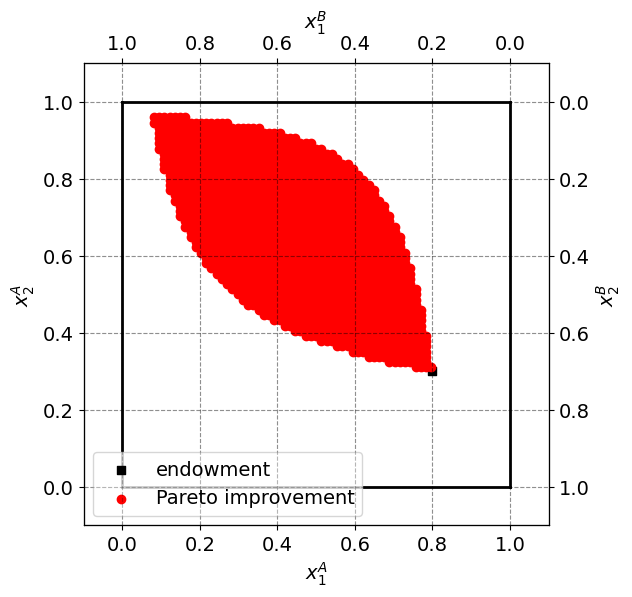

In [4]:

print(par)
N = 75
x1A, x2A = np.linspace(0,1,N), np.linspace(0,1,N)
pareto = model.pareto(x1A,x2A)

import matplotlib.pyplot as plt
# Taking x and y from the pareto list
x_coords = [pair[0] for pair in pareto]
y_coords = [pair[1] for pair in pareto]


w1bar = 1.0
w2bar = 1.0

#Properties for the figure
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# A
ax_A.scatter(par.w1A,par.w2A,marker='s',color='black',label='endowment')
ax_A.scatter(x_coords, y_coords, label='Pareto improvement', color='red')

# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='lower left');


## 2. <a id='toc2_'></a>[Calculating the error in the market clearing conditions](#toc2_)

We find possible errors in the market clearing condition by looping over possible values in $p_{1}$ for $p_{1}\in\mathcal{P_1}$ The market clearing condition is illustrated.

In [5]:
p1 = []
for i in range(N+1):
    p1.append(0.5 + 2*i/N)

#initializing error term
error = []
for i in p1:
    error.append(model.check_market_clearing(i))
    
print(error[0:5])


[(0.533333333333333, -0.2666666666666666), (0.47594936708860747, -0.25066666666666654), (0.42409638554216866, -0.23466666666666652), (0.3770114942528735, -0.2186666666666665), (0.334065934065934, -0.2026666666666665)]


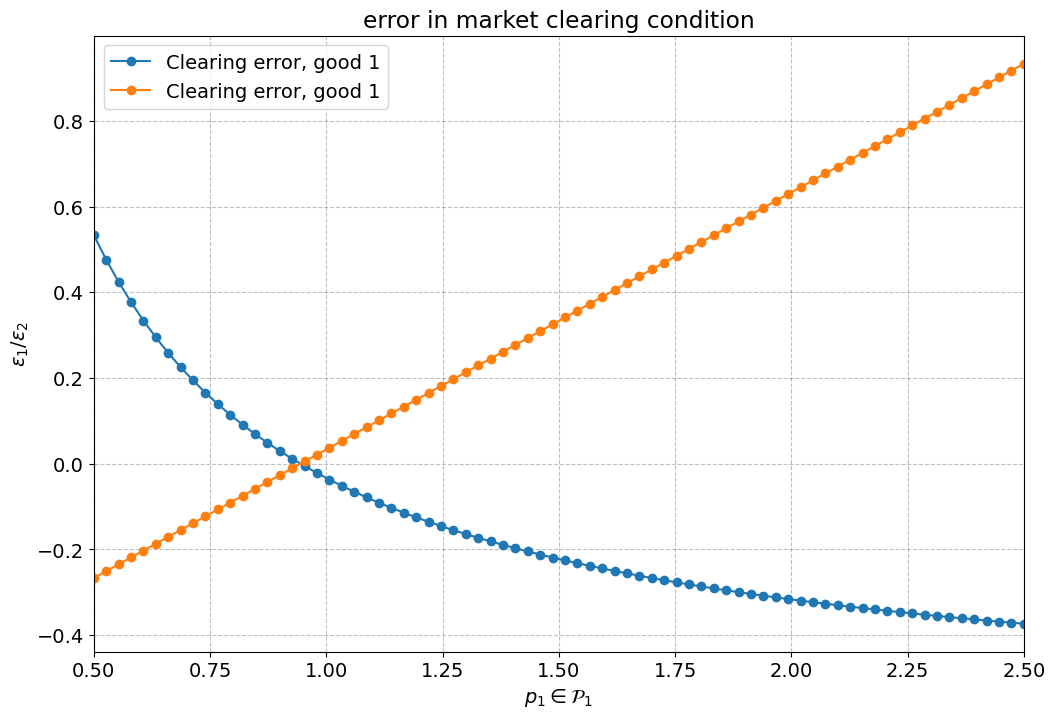

In [6]:
fig = plt.figure(figsize=(12,8))

ax = fig.add_subplot(1,1,1)
ax.set_title('error in market clearing condition')
ax.plot(p1,error,'-o',label='Clearing error, good 1')

ax.set_xlabel('$p_1 \in \mathcal{P}_1$')
ax.set_ylabel('$\epsilon_1/\epsilon_2$')
ax.set_xlim([0.5, 2.5])
ax.legend(frameon=True)

By observing the above graph, the equilibrium price is identified at the intersecting graphs. This gives the equilibrium price as approximately 0.9. In this this point the error in the market clearing is 0. By applying Walras' law, this would mean the clearing of one market also clears the other.

## 3. <a id='toc3_'></a>[Market clearing price](#toc3_)

The market clearing price is given as the price at which the demand for a good equates the price. This means the clearing price is the choice of p1 that will minimize errors calculated in Question 2. The market clearing price is observed as being close to 1, but a more precisely price is now calculated. Walras' law is applied, and both markets will clear. Furthermore this means we only need to check for one of the computed errors.

In [7]:
# Solving the model using Walras's law + scipy's root_scalar function
model.solve(type='market')

# Saving the following solutions to be used for a plot later in the assignment
x1A_best_market=model.sol.x1
x2A_best_market=model.sol.x2
U_market = model.sol.u

x1A = 0.373 x2A = 0.704, U_market = 1.058, u_A = 0.569, u_B = 0.489, p = 0.944


## 4. <a id='toc4_'></a>[Price optimization](#toc4_)

## 4a. <a id='toc4_'></a>[Finding allocation if only prices in p1 can be chosen](#toc4_)


Consumer A chooses p1 from $p_{1}$ for $\mathcal{P_1}$ that will maximize her utility. The maximization of the utility is found by looping over all possible $p_{1}$ by taking into account consumer B's consumption bundle at the same given $p_{1}$.

In [8]:
utility_1 = -np.inf
price_1 = None

# Looping over p1 
for i in p1:
# Ensuring that 1-demand_B is greater than 0, so we dont end up with 0 utility for consumer A
    if 1-model.demand_B(i)[0] > 0 and 1-model.demand_B(i)[1]>0:

        # Compute the utility for the good left over for A
        utilitymax_A = model.utility_A(1-model.demand_B(i)[0], 1-model.demand_B(i)[1])
        # Renew utility_1 if utilitymax_A is greater
        if utilitymax_A > utility_1:
            utility_1 = utilitymax_A
            price_1 = i

index = np.nanargmax(utilitymax_A)
print(f'Consumer A will choose p1 = {price_1:.2f} to maximize its own utility, which is {utilitymax_A:.2f}')
print(f'The allocation is given as: x1A = {model.demand_A(price_1)[0]:.2f} and x2A = {model.demand_A(price_1)[1]:.2f}')


Consumer A will choose p1 = 1.89 to maximize its own utility, which is 0.63
The allocation is given as: x1A = 0.32 and x2A = 1.21


## 4b. <a id='toc4_'></a>[Finding allocation if any positive price can be chosen](#toc4_)

We utilize the same method seen in 4.b for $p_{1}>0$ by looping over $p_{1}$ in the given numpy range: 0 to 100. 

In [9]:
utility_2= -np.inf
anyprice_1 = None
# Loop over any price between 0 and 100
for i in np.arange(0.00001,100,1e-3):

    # Be sure that the good left over for A is of positive utility since negative good quantities will correspond to a utility value in complex numbers
    if 1-model.demand_B(i)[0] > 0 and 1-model.demand_B(i)[1]>0:

        # Compute the utility for the good left over for A
        utilitymax_A = model.utility_A(1-model.demand_B(i)[0], 1-model.demand_B(i)[1])
        
        # Update ua_best if ua is of higher value
        if utilitymax_A > utility_2:
            utility_2 = utilitymax_A
            anyprice_1 = i

print(f'If A can choose any p1>0, A chooses the price p1 = {anyprice_1:.2f} to maximize her own utility, which is then {utility_2:.2f}')
print(f'The allocation is then: x1B = {model.demand_B(anyprice_1)[0]:.2f} and x2B = {model.demand_B(anyprice_1)[1]:.2f}')
print(f'For consumer A it is: x1A = {1-model.demand_B(anyprice_1)[0]:.2f} and x2A = {1-model.demand_B(anyprice_1)[1]:.2f}')

#Why is the price almost the same as when we had to choose from the price vector? In this case we expect a lower price, when the consumer 
# can choose any price p>0 such as 0.2

If A can choose any p1>0, A chooses the price p1 = 1.90 to maximize her own utility, which is then 0.63
The allocation is then: x1B = 0.38 and x2B = 0.36
For consumer A it is: x1A = 0.62 and x2A = 0.64


## 5. <a id='toc5_'></a>[Utility optimization](#toc5_)

In question 5 we assume that A chooses B’s consumption, but such that B is not worse of than in the initial endowment. This makes A the market maker, from which A will maximize the its utility.

## 5a. <a id='toc5_'></a>[Allocation in restricted choice set](#toc5_)

A maximizes its utility while choosing the given bundle: $(x_1^A, x_2^A)$.

In [19]:
from scipy.optimize import minimize
# Assuming the list of tuples is stored in the variable 'pareto_improve'
x1A_c, x2A_c = zip(*pareto)
x1A_c, x2A_c = np.array(x1A_c).flatten(), np.array(x2A_c).flatten() # Flattening the list of tuples

utilityA_c = model.utility_A(x1A_c,x2A_c)
# print(utilityA_c)

# # Finding the maximum utility and the corresponding index (Using nanmax and nanargmax to handle NaN values)
utilityA_max_c = np.max(utilityA_c)
index_c = np.argmax(utilityA_c)

print(f'UtilityA_max_c = {utilityA_max_c:.4f}')
print(f'The allocation is for agent A: x1 = {1-x1A_c[index]:.4f}, x2 = {1-x2A_c[index]:.4f}')

UtilityA_max_c = 0.7416
The allocation is for agent A: x1 = 0.9189, x2 = 0.0541


## 5b. <a id='toc5_'></a>[Allocation without further restrictions](#toc5_)

When there are no restrictions imposed, A maximizes its utility under the given constriction s.t. Possible allocations are now infinitely large between the interval 0 to 1. N is set to 2000.

In [11]:
# In this case we have that x1A and x2A exist on values between 0 and 1

# Specifying a great number of N
N = 1998

# Set initial conditions
x1possible = np.linspace(0, 1, N)
x2possible = np.linspace(0, 1, N)
utilitymax_A = -np.inf
x1best = -np.inf
x2best = -np.inf

# Similar loop as 5.a 
for x1A in x1possible:
    for x2A in x2possible:
        utilitynew_A = model.utility_A(x1A, x2A)
        if model.utility_A(x1A, x2A) > utilitymax_A and model.utility_B(1 - x1A, 1 - x2A) >= model.utility_B(1 - par.w1A, 1 - par.w2A):
            utilitymax_A = utilitynew_A
            x1best = x1A 
            x2best = x2A

print(f'Max level of utility consumer A = {utilitymax_A:.3f}: (x1A, x2A) = ({x1best:.3f}, {x2best:.3f})')
print(f'Max level of utility consumer B = {model.utility_B(1 - x1best, 1 - x2best):.3f}: (x1B, x2B) = ({1 - x1best:.3f}, {1 - x2best:.3f})')


Max level of utility consumer A = 0.743: (x1A, x2A) = (0.574, 0.846)
Max level of utility consumer B = 0.304: (x1B, x2B) = (0.426, 0.154)


## 6. <a id='toc6_'></a>[Social planner optimization](#toc6_)

We assumme A’s and B’s consumption are chosen by a utilitarian social planner to maximize
aggregate utility

## 6a. <a id='toc6_'></a>[Finding the allocation](#toc6_)


In [12]:
x1A_social, x2A_social= model.solve_social_planner()
print(f'Allocation: x1 = {x1A_social:.3f}, x2 = {x2A_social:.3f}')
print(f'And utility = {model.utility_A(x1A_social,x2A_social):.3f}')

Allocation: x1 = 0.333, x2 = 0.667
And utility = 0.529


## 6b. <a id='toc6_'></a>[Illustration ](#toc6_)

Allocations are plotted and illustrated in the Edgeworth box

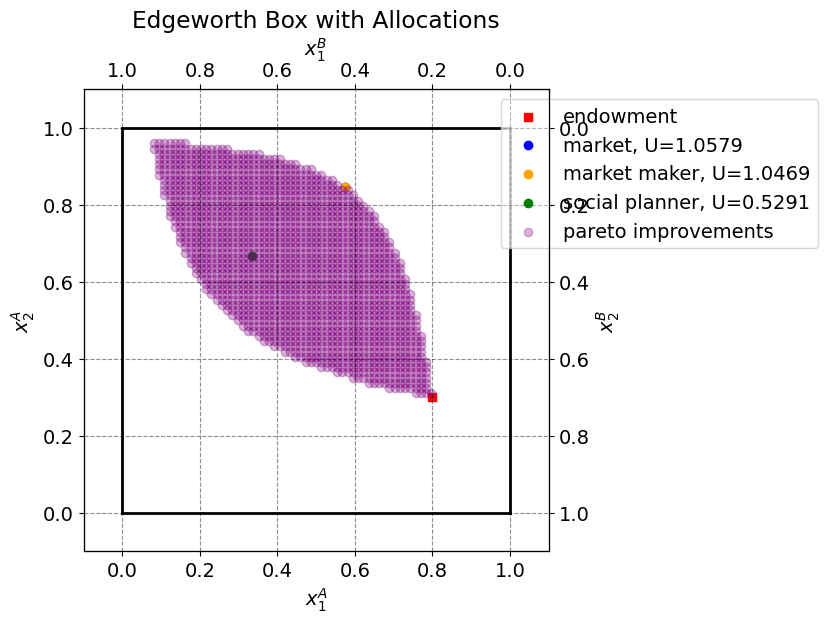

In [13]:
# All endowment held by each consumer
w1bar = 1.0
w2bar = 1.0

fig = plt.figure(frameon=False, figsize=(6, 6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# Plotting the points
ax_A.scatter(model.par.w1A, model.par.w2A, marker='s', color='red', label='endowment')
ax_A.scatter(x1best, x2best, color='blue', label=f'market, U={U_market:.4f}')
ax_A.scatter(x1best, x2best, color='orange', label=f'market maker, U={utilitymax_A + model.utility_B(1-x1best, 1-x2best):.4f}')
ax_A.scatter(x1A_social, x2A_social, color='green', label=f'social planner, U={model.utility_A(x1A_social, x2A_social):.4f}')
ax_A.scatter(x_coords, y_coords, color='purple', alpha=0.3, label='pareto improvements')

# limits
ax_A.plot([0, w1bar], [0, 0], lw=2, color='black')
ax_A.plot([0, w1bar], [w2bar, w2bar], lw=2, color='black')
ax_A.plot([0, 0], [0, w2bar], lw=2, color='black')
ax_A.plot([w1bar, w1bar], [0, w2bar], lw=2, color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

# Adding a title and adjusting the legend
ax_A.set_title('Edgeworth Box with Allocations')
ax_A.legend(frameon=True, loc='upper right', bbox_to_anchor=(1.6, 1.0))

plt.show()


## 7. <a id='toc7_'></a>[Drawing of set $\mathcal{W}$](#toc7_)

A set W with 50 elements are drawn. The illustration is made up of a data type that is of random endowment and drawn from uniform distribution.

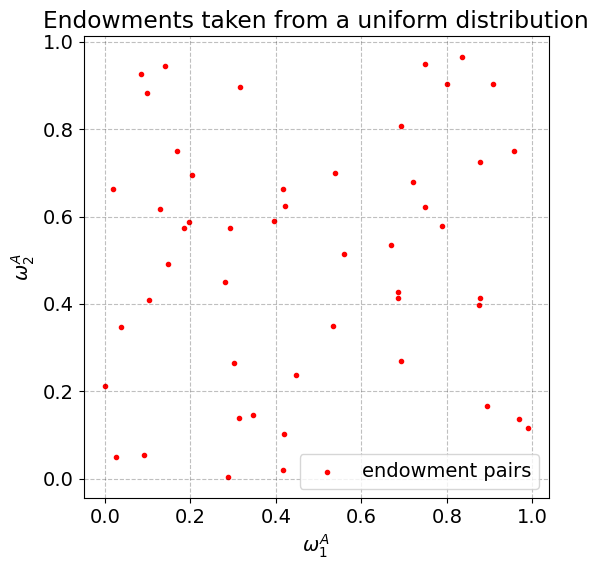

In [14]:
# Setting seed
np.random.seed(1)

w1A = np.random.uniform(low=0,high=1,size=50)
w2A = np.random.uniform(low=0,high=1,size=50)

fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_D = fig.add_subplot(1, 1, 1)

ax_D.set_xlabel("$\omega_1^A$")
ax_D.set_ylabel("$\omega_2^A$")
ax_D.set_title("Endowments taken from a uniform distribution")

ax_D.scatter(w1A, w2A, label = "endowment pairs", color="red", marker=".")
ax_D.legend()

## 8. <a id='toc6_'></a>[Market equilibrium](#toc8_)

We find the market equilibrium allocation for each bundle. The equilibrium is plotted in the Edgeworth box.

In [15]:
equlibriums = []

for i in range(len(w1A)):
    w1A_val = w1A[i]
    w2A_val = w2A[i]
    print(f'Iteration {i+1}: w1A = {w1A_val:.3f}, w2A = {w2A_val:.3f}')
    model.par.w1A = w1A_val
    model.par.w2A = w2A_val
    model.solve(type='market')
    
    equlibriums.append((model.sol.x1, model.sol.x2))
    
    print(f'Iteration {i+1}: w1A = {w1A_val:.3f}, w2A = {w2A_val:.3f}')

# Unpack the equilibrium results
x1A_w, x2A_w = zip(*equlibriums)

# Reset model parameters to orignial:
model.par.w1A = 0.8
model.par.w2A = 0.3

Iteration 1: w1A = 0.417, w2A = 0.019
x1A = 0.144 x2A = 0.402, U_market = 1.045, u_A = 0.285, u_B = 0.760, p = 1.398
Iteration 1: w1A = 0.417, w2A = 0.019
Iteration 2: w1A = 0.720, w2A = 0.679
x1A = 0.535 x2A = 0.821, U_market = 1.050, u_A = 0.712, u_B = 0.338, p = 0.768
Iteration 2: w1A = 0.720, w2A = 0.679
Iteration 3: w1A = 0.000, w2A = 0.212
x1A = 0.039 x2A = 0.141, U_market = 1.018, u_A = 0.092, u_B = 0.925, p = 1.788
Iteration 3: w1A = 0.000, w2A = 0.212
Iteration 4: w1A = 0.302, w2A = 0.266
x1A = 0.167 x2A = 0.445, U_market = 1.049, u_A = 0.321, u_B = 0.727, p = 1.332
Iteration 4: w1A = 0.302, w2A = 0.266
Iteration 5: w1A = 0.147, w2A = 0.492
x1A = 0.173 x2A = 0.456, U_market = 1.049, u_A = 0.331, u_B = 0.719, p = 1.315
Iteration 5: w1A = 0.147, w2A = 0.492
Iteration 6: w1A = 0.092, w2A = 0.053
x1A = 0.041 x2A = 0.145, U_market = 1.018, u_A = 0.095, u_B = 0.923, p = 1.782
Iteration 6: w1A = 0.092, w2A = 0.053
Iteration 7: w1A = 0.186, w2A = 0.574
x1A = 0.221 x2A = 0.532, U_marke

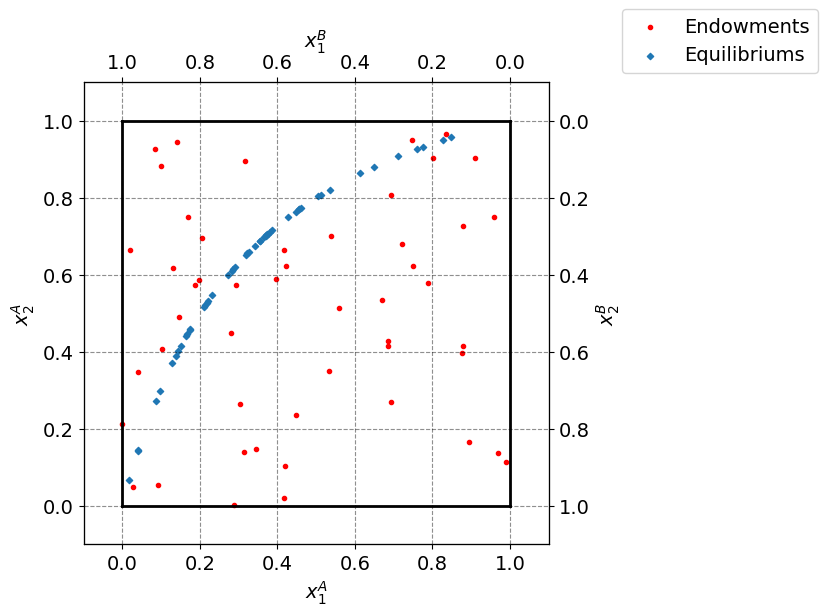

In [16]:
w1bar = 1.0
w2bar = 1.0
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# A
ax_A.scatter(w1A,w2A,marker='.',color='red',label='Endowments')
ax_A.scatter(x1A_w,x2A_w, marker='D', s=10, label=f'Equilibriums')


# Limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True, loc='lower right', bbox_to_anchor=(1.6,1.0));

The Walras-equilibria is observed in the Edgeworth Box, displaying endowments and equilibria. It takes the shape a curve which corresponds to a contract curve which has within it the inner solutions and allocations after trade. Furthermore, in this allocation both players are both players are well off.